<a href="https://colab.research.google.com/github/TuckerRasbury/00_MaternalMortalityandAbortionRelatedStatistics/blob/main/01_DataWrangling_PublicData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projecting Heightened Maternal Mortality
- _by: Isaac D. Tucker-Rasbury_
- _Start: 6/27/2022_

##### Summary
Ingesting data from reputable sources and conducting a regression analysis to forecast maternal mortality by state. 

##### Objective
* 1. Subject Matter - Mapping Maternal Morbidity Factors On the US and then Layering in abortion care restrictions and bans.
* 2. Skillset Used - data wrangling to visualization.
* 3. Goal - Leverage Python to aggregate data fromb Public Sources and Subject matter expert sites.

## Environment Setup and Dataset Imports 

### Initial Imports for creating Data Analytics Environment

In [ ]:
# Easiest Import Option

## Libraries for Data Science - Import All Statement
# OFF SWITCH -> import pyforest

# OFF SWITCH -> lazy_imports()


In [ ]:
#Pip Update
%pip install --upgrade pip
%pip --version


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
pip 22.3.1 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)


In [ ]:
# Installations and Imports for creating Data Analytics Environment

%pip install --upgrade pyforest
 #Comment | %python -m pyforest install_extensions
%pip install --upgrade folium
%pip install pandas
%pip install matplotlib
%pip install bonobo
%pip install scrapy # Project Description - https://pypi.org/project/Scrapy/
%pip install beautifulsoup4 # Project Description - https://pypi.org/project/beautifulsoup4/
%pip install seaborn
%pip install geoplotlib
%pip install Pyglet
%pip install plotly


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in

### Libraries Imported Explicitly

In [ ]:
## Data Mining - explicit mention
import scrapy
from bs4 import BeautifulSoup

In [ ]:
## Python to Web Queries Made easier
import requests
import json
import urllib3
from urllib3 import request

In [ ]:
## to handle certificate verification
import certifi

In [ ]:
## Data Processing and Modeling - explicit mention
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
## Data Viz and Plotting
import seaborn as sns

# OFF SWITCH -> import geoplotlib
# OFF SWITCH -> from geoplotlib.utils import read_csv, BoundingBox

import plotly.express as px

## Dataviz Libraries Appendix
# Link: https://towardsdatascience.com/best-libraries-for-geospatial-data-visualisation-in-python-d23834173b35

In [ ]:
## Pipeline - ETL Library
import bonobo #Footnote: https://www.bonobo-project.org/


In [ ]:
# Handling Certificate Validation (see pip install certifi)
#http = urllib3.PoolManager(
#      cert_reqs==|CERT_REQUIRED|
#      ca_certs==certifi.where())

In [ ]:
# to handle certificate verification
import certifi

### Import Datasets and Accompanying Details



In [ ]:
# Import Data

## How To: Compile the data for this analysis 
## Step 1. Pull data from PDF (
## [Maternal deaths and mortality rates: Each state, the District of Columbia, United States, 2018‐2020](https://www.cdc.gov/nchs/maternal-mortality/MMR-2018-2020-State-Data.pdf)


## Step 2. Webscrape data from guardian website (https://www.theguardian.com/us-news/ng-interactive/2022/jun/28/tracking-where-abortion-laws-stand-in-every-state))


In [ ]:
## STEP 1 ---- Ingesting "Maternal deaths and mortality rates: Each state, the District of Columbia, United States, 2018‐2020" 
### Byline: NCHS, National Vital Statistics SystemSOURCE: NCHS, National Vital Statistics System
### Shape of the Data: PDF file

 
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

worksheet = gc.open('VitalStatistics_raw_data').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render.
VitalStatistics_clean_df = pd.DataFrame.from_records(rows)

# Print Table as a Success Check
# VitalStatistics_clean_df.head(52)

### FOOTNOTES
# Importing from Google Sheets - https://colab.research.google.com/notebooks/snippets/sheets.ipynb#scrollTo=JiJVCmu3dhFa
   

[['State', 'Abbreviation', 'Deaths [1]', 'Maternal mortality rate', '95% lower confidence limit', '95% upper confidence limit'], ['Alabama', 'AL', '63', '36.2', '27.8', '46.3'], ['Alaska', 'AK', '8', '*', '*', '*'], ['Arizona', 'AZ', '67', '28.3', '21.9', '35.9'], ['Arkansas', 'AR', '44', '40.4', '29.4', '54.3'], ['California', 'CA', '135', '10.2', '8.5', '11.9'], ['Colorado', 'CO', '27', '14.4', '9.5', '21.0'], ['Connecticut', 'CT', '18', '*', '*', '*'], ['Delaware', 'DE', '5', '*', '*', '*'], ['District of Columbia', '', '7', '*', '*', '*'], ['Florida', 'FL', '141', '21.7', '18.1', '25.2'], ['Georgia', 'GA', '108', '28.8', '23.4', '34.2'], ['Hawaii', 'HI', '7', '*', '*', '*'], ['Idaho', 'ID', '11', '*', '*', '*'], ['Illinois', 'IL', '54', '12.9', '9.7', '16.8'], ['Indiana', 'IN', '68', '28.2', '21.9', '35.8'], ['Iowa', 'IA', '14', '*', '*', '*'], ['Kansas', 'KS', '23', '21.7', '13.8', '32.5'], ['Kentucky[D]', 'KY', '63', '39.7', '30.5', '50.8'], ['Louisiana', 'LA', '56', '31.8', '24.

In [ ]:
# Data Cleaning - Table 1
## Standardize table versions so pipeline can only read but not write from datasource
VitalStatistics_df = VitalStatistics_clean_df.head(52)

# First row to header
VitalStatistics_df.columns = VitalStatistics_df.iloc[0]
VitalStatistics_df = VitalStatistics_df[2:]

# Rubber Stamping - Ready to Use Data: Table 1 Maternal Mortality Data
VitalStatistics_df.head()

,State,Abbreviation,Deaths [1],Maternal mortality rate,95% lower confidence limit,95% upper confidence limit
2,Alaska,AK,8,*,*,*
3,Arizona,AZ,67,28.3,21.9,35.9
4,Arkansas,AR,44,40.4,29.4,54.3
5,California,CA,135,10.2,8.5,11.9
6,Colorado,CO,27,14.4,9.5,21.0


In [ ]:
# Summary Statistics
VitalStatistics_df.describe()

,State,Abbreviation,Deaths [1],Maternal mortality rate,95% lower confidence limit,95% upper confidence limit
count,50,50,50,50,50,50
unique,50,50,40,28,27,30
top,Alaska,AK,7,*,*,*
freq,1,1,4,21,21,21


In [ ]:
# PreWork - Data Cleaning

## 1. View current types
print(VitalStatistics_df.dtypes)

0
State                         object
Abbreviation                  object
Deaths [1]                    object
Maternal mortality rate       object
95% lower confidence limit    object
95% upper confidence limit    object
dtype: object


In [ ]:
# List of Columns
VitalStatistics_df.columns.values.tolist()

['State',
 'Abbreviation',
 'Deaths [1]',
 'Maternal mortality rate',
 '95% lower confidence limit',
 '95% upper confidence limit']

## Analysis Section

1. What is the state of abortion access by state?
2. Which states have the highest rates of maternal mortality? (10 States)
3. Which states have the lowest number of abortion providers? (10 States)
4. Distribution of pregnancy related deaths for the US?

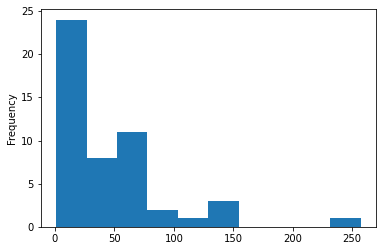

In [ ]:
# Get the Distribution of death and mortality rate

## Import necessary library
import matplotlib.pyplot as plt

# Historgram - Deaths
VitalStatistics_df['Deaths [1]'].plot(kind='hist')

In [ ]:
# Testing the Total - Sum Deaths and Average Maternal Mortality


# Appendix

## Resources Referenced Throughout Research

***Institutions***
* [Centers for Disease Control and Prevention's National Center for Health Statistics (NCHS)](https://www.cdc.gov/nchs/maternal-mortality/data.htm)

***Data Sources***
* [National Center for Health Statistics. Compressed Mortality File, 1999-2016 (machine readable data file and documentation, CD‑ROM Series 20, No. 2V) as compiled from data provided by the 57 vital statistics jurisdictions through the Vital Statistics Cooperative Program.  Hyattsville, Maryland. 2017.](https://www.cdc.gov/nchs/data_access/cmf.htm)

* [Maternal deaths and mortality rates: Each state, the District of Columbia, United States, 2018‐2020](https://www.cdc.gov/nchs/maternal-mortality/MMR-2018-2020-State-Data.pdf)

* [Centers for Disease Control and Prevention's Reproductive Health Data and Statistics](https://www.cdc.gov/reproductivehealth/data_stats/index.htm)


***Articles/Academic Papers***
* [University of Colorado Boulder - Study: Banning abortion would boost maternal mortality by double digits](https://www.colorado.edu/today/2021/09/08/study-banning-abortion-would-boost-maternal-mortality-double-digits)

* [National Institute of Health's Office of Research on Women's Health - What Are Maternal Morbidity and Mortality?](https://orwh.od.nih.gov/mmm-portal/what-mmm)

* [Nelson, D.B., Moniz, M.H. & Davis, M.M. Population-level factors associated with maternal mortality in the United States, 1997–2012. BMC Public Health 18, 1007 (2018)](https://bmcpublichealth.biomedcentral.com/articles/10.1186/s12889-018-5935-2)

* [The Pew Charitable Trusts | Critics Fear Abortion Bans Could Jeopardize Health of Pregnant Women by Michael Ollove](https://www.pewtrusts.org/en/research-and-analysis/blogs/stateline/2022/06/22/critics-fear-abortion-bans-could-jeopardize-health-of-pregnant-women)

* [National Institutes of Health | Eunice Kennedy Shriver National Institute of Child Health and Human Development | What factors increase the risk of maternal morbidity and mortality?](https://www.nichd.nih.gov/health/topics/maternal-morbidity-mortality/conditioninfo/factors#)

* [The Guardian | Tracking Where Abortion Laws Stand in Every US State](https://www.theguardian.com/us-news/ng-interactive/2022/jun/28/tracking-where-abortion-laws-stand-in-every-state)